# Exercise 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Ex 1.1
p1 = np.array([[1, 2, 1]]).T  # 3x1
p2 = np.array([[4, 2, 2]]).T
p3 = np.array([[6, 4, -1]]).T
p4 = np.array([[5, 3, 0.5]]).T

q1 = p1[:2] / p1[2]
q2 = p2[:2] / p2[2]
q3 = p3[:2] / p3[2]
q4 = p4[:2] / p4[2]

# Transpose for better viewing
print(q1.T, q2.T, q3.T, q4.T)

[[1. 2.]] [[2. 1.]] [[-6. -4.]] [[10.  6.]]


In [3]:
# Ex 1.2
p1 = np.array([[1, 10, -3, 1]]).T  # 4x1
p2 = np.array([[2, -4, 1.1, 2]]).T
p3 = np.array([[0, 0, -1, 10]]).T
p4 = np.array([[-15, 3, 6, 3]]).T

q1 = p1[:-1] / p1[-1]
q2 = p2[:-1] / p2[-1]
q3 = p3[:-1] / p3[-1]
q4 = p4[:-1] / p4[-1]

# Transpose for better viewing
print(q1.T, q2.T, q3.T, q4.T)

[[ 1. 10. -3.]] [[ 1.   -2.    0.55]] [[ 0.   0.  -0.1]] [[-5.  1.  2.]]


Ex 1.3

$$
    \begin{align*}
    x + 2y &= 3 \\
    0 &= x + 2y - 3 \\
    0 & = \begin{bmatrix}
    1 \\
    2 \\
    -3
    \end{bmatrix}^T
    \begin{bmatrix}
    x \\
    y \\
    1
    \end{bmatrix} \\
    \therefore l &= \begin{bmatrix}
    1 \\
    2 \\
    -3
    \end{bmatrix}
    \end{align*}
$$

In [4]:
# Ex 1.4, 2D points on a line
lt = np.array([[1, 2, -3]])  # 1x3 for dot operation later

p1 = np.array([[3, 0, 1]]).T  # 3x1
p2 = np.array([[6, 0, 2]]).T
p3 = np.array([[1, 1, 2]]).T
p4 = np.array([[1, 1, 1]]).T
p5 = np.array([[110, -40, 10]]).T
p6 = np.array([[11, 4, 1]]).T

p = np.hstack((p1, p2, p3, p4, p5, p6))
p.shape

(3, 6)

In [5]:
lt @ p
# Ans: p1, p2, p4, p5 lie on the line because the dot product is 0

array([[ 0,  0, -3,  0,  0, 16]])

In [6]:
# Ex 1.5, intersection of 2 lines
l0 = np.array([[1, 1, -1]])  # 1x3 for cross operation
l1 = np.array([[-1, 1, -3]])
np.cross(l0, l1)  # cross product

array([[-2,  4,  2]])

Ex 1.6

$Ap = q$, where $p$ is the input point, and $q$ is the output point.

- $10$ scales both x and y coordinates by 10. 
- the x-coordinate is translated by $2$ units
-  y-coordinate translated by $3$ units.

In [7]:
# Ex 1.7
def point_line_distance(line, p):
    """
    Calculate shortest distance d between line l and 2D homogenous point p.

    Args:
        line : 3x1 vector representing the homogeneous line
        p : 3x1 vector representing the homogeneous point

    Returns:
        d : shortest absolute distance between line and point
    """
    if p.shape != (3, 1):
        raise ValueError("p must be a 3x1 homogenous vector")
    if line.shape != (3, 1):
        raise ValueError("line must be a 3x1 homogenous vector")

    d = abs(line.T @ p) / (abs(p[2]) * np.sqrt(line[0] ** 2 + line[1] ** 2))
    return d

In [8]:
rt2 = np.sqrt(2)
line = np.array([[1 / rt2, 1 / rt2, -1]]).T

p1 = np.array([[0, 0, 1]]).T
p2 = np.array([[rt2, rt2, 1]]).T
p3 = np.array([[rt2, rt2, 4]]).T

print(point_line_distance(line, p1))
print(point_line_distance(line, p2))
print(point_line_distance(line, p3))

[[1.]]
[[1.]]
[[0.5]]


In [9]:
# Ex 1.8
line = np.array([[2, 2, -1]]).T

p1 = np.array([[0, 0, 1]]).T
p2 = np.array([[rt2, rt2, 1]]).T
p3 = np.array([[rt2, rt2, 4]]).T

print(point_line_distance(line, p1))
print(point_line_distance(line, p2))
print(point_line_distance(line, p3))

[[0.35355339]]
[[1.64644661]]
[[0.14644661]]


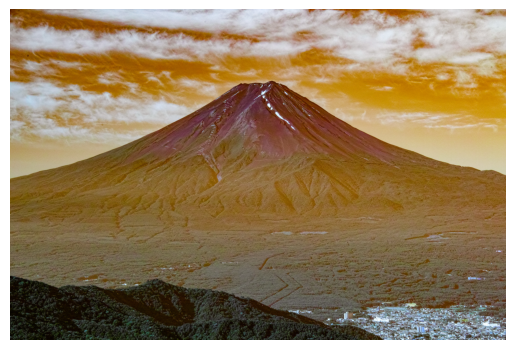

In [10]:
# Ex 1.9
img = cv2.imread("media/Fuji.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

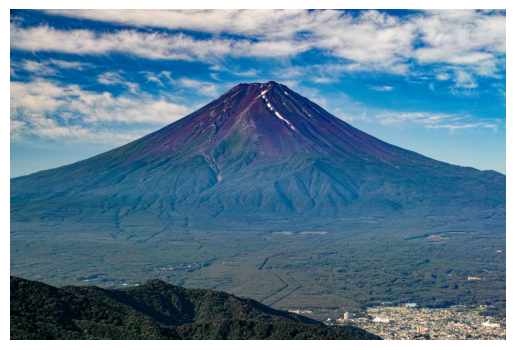

In [11]:
# openCV reads BGR, plt uses RGB
plt.imshow(img[:, :, ::-1])  # flip channels
plt.axis("off")
plt.show()

In [12]:
# Ex1.11
import itertools as it


def box3d(n=16):
    """Generate 3D points inside a cube with n-points along each edge"""
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i,) * n, (j,) * n, N])))
    return np.hstack(points) / 2

In [13]:
# Ex 1.12
def Pi(ph):
    """
    Converts coordinates from homogeneous to inhomogeneous.

    Args:
        ph (np.array): shape (n+1,m)

    Returns:
        p (np.array): shape (n,m)
    """
    p = ph[:-1] / ph[-1]  # divide by and remove last coordinate
    return p


def PiInv(p):
    """
    Converts coordinates from inhomogeneous to homogeneous.

    Args:
        p (np.array): shape (n,m)

    Returns:
        ph (np.array): shape (n+1,m)
    """
    ph = np.vstack((p, np.ones(p.shape[1])))
    return ph

In [14]:
# Test Pi and PiInv
p1 = np.array([[3], [0], [1], [1]])  # 4x1
p2 = np.array([[3], [0], [1], [2]])
p3 = np.array([[3], [0], [1], [3]])
ph = np.hstack((p1, p2, p3))  # 4x3

p = Pi(ph)
print(p)  # 3x3

ph2 = PiInv(p)
print(ph2)  # 4x3

[[3.         1.5        1.        ]
 [0.         0.         0.        ]
 [1.         0.5        0.33333333]]
[[3.         1.5        1.        ]
 [0.         0.         0.        ]
 [1.         0.5        0.33333333]
 [1.         1.         1.        ]]


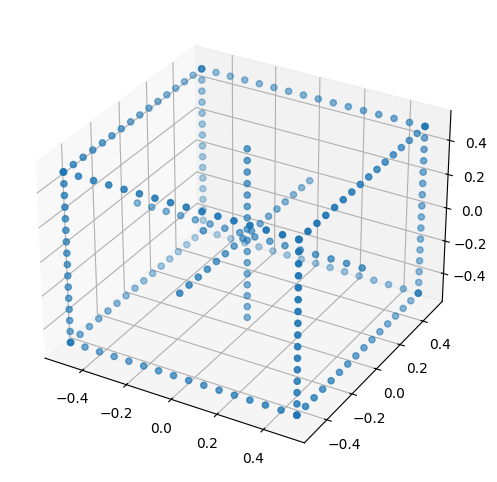

In [15]:
box = box3d()  # 3x240 matrix

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.scatter(box[0, :], box[1, :], box[2, :])
plt.show()

In [16]:
# Ex 1.13
def project_points(K, R, t, Q):
    """
    Project 3D points in Q onto a 2D plane of a camera

    Args:
        K: intrinsic camera matrix, shape (3, 3)
        R: rotation matrix, shape (3, 3)
        t: translation matrix. shape (3, 1)
        Q: 3D points matrix, shape (3, n)

    Returns:
        P : 2D points matrix, shape (2, n)
    """
    Qh = PiInv(Q)  # 4 x n
    pose = np.hstack((R, t))  # 3 x 4
    Ph = K @ pose @ Qh  # 3 x n
    P = Pi(Ph)  # 2 x n
    return P

In [17]:
Q = box3d()  # 3x240 matrix
K = np.eye(3)

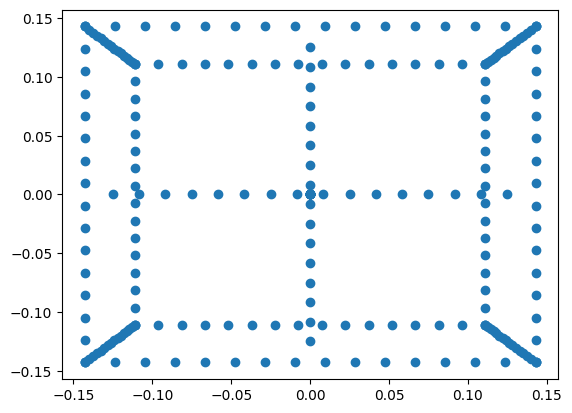

In [18]:
R = np.eye(3)
t = np.array([[0, 0, 4]]).T
P = project_points(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()

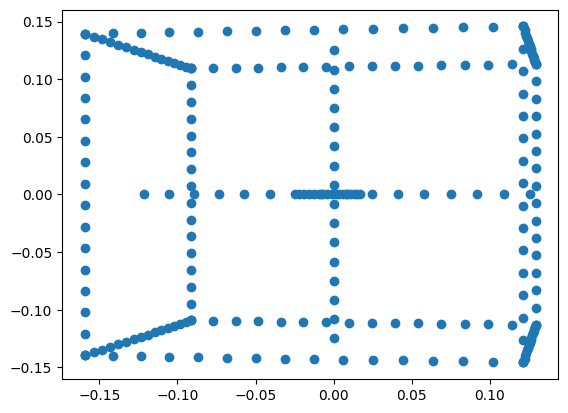

In [19]:
# Ex 1.14
th = 30
R = np.array(
    [[np.cos(th), 0, np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]]
)
t = np.array([[0, 0, 4]]).T

P = project_points(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()

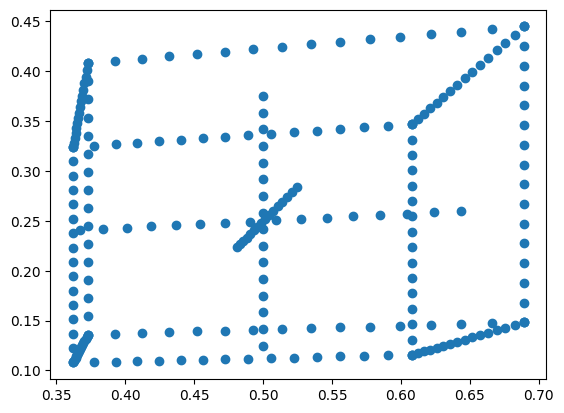

In [20]:
# Ex 1.15
th = 60
R = np.array(
    [[np.cos(th), 0, np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]]
)
t = np.array([[2, 1, 4]]).T

P = project_points(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()